In [1]:
#ライブラリの設定
!pip install -q -r ./requirements.txt

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow==2.4.0


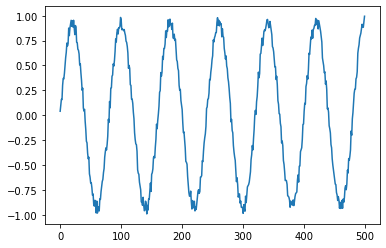

In [2]:
# 9-2 RNNを使ってsin波を予測してみよう
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
import os

#シード値の固定
seed = 1
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
%matplotlib inline

#データの読み込み
data = np.loadtxt("./rnn_sin_40_80.csv")
plt.plot(data[:500])
plt.show()

In [3]:
#history_stepsステップ数を入力に使い、future_stepsステップ数を予測する様にデータを加工する
def create_dataset(data, history_steps, future_steps):
    input_data = []
    output_data= []
    
    for i in range(len(data)-history_steps-future_steps):
        input_data.append([[val] for val in data[i:i+history_steps]])
        output_data.append(data[i+history_steps:i+history_steps+future_steps])
    
    return np.array(input_data), np.array(output_data)

train_data = data[:int(len(data) * 0.75)]
test_data = data[int(len(data) * 0.75):]

#10ステップ分のデータから５ステップ未来までを予測するようなデータを作成する
history_steps = 10
future_steps = 5
x_train, y_train = create_dataset(train_data, history_steps, future_steps)
x_test, y_test   = create_dataset(test_data, history_steps, future_steps)  

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2385, 10, 1)
(2385, 5)
(785, 10, 1)
(785, 5)


In [4]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

#モデルの構築
model_rnn = Sequential()  
model_rnn.add(SimpleRNN(units=future_steps, input_shape=(history_steps,1),return_sequences=False))
model_rnn.add(Dense(future_steps,activation="linear"))  
model_rnn.compile(optimizer = Adam(lr=0.001), loss="mean_squared_error",)

#モデルの構造を表示する
print(model_rnn.summary())

#学習開始
history = model_rnn.fit(x_train, y_train, batch_size=32, epochs=500, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500


C:\Users\etsuk\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


75/75 [==============================] - 1s 2ms/step - loss: 0.4821
Epoch 2/500
75/75 [==============================] - 0s 2ms/step - loss: 0.2468
Epoch 3/500
75/75 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 4/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 5/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 6/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 7/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 8/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 9/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0226
Epoch 10/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 11/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 12/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 13/500
75/75 [=============================

75/75 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 103/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 104/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 105/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 106/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 107/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 108/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 109/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 110/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 111/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 112/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 113/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 114/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 203/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 204/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 205/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 206/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 207/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 208/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 209/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 210/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 211/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 212/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 213/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 214/500
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 303/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 304/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 305/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 306/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 307/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 308/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 309/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 310/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 311/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 312/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 313/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 314/500
75/75 [=========

75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 403/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 404/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 405/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 406/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 407/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 408/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 409/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 410/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 411/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 412/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 413/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 414/500
75/75 [=========

25/25 [==============================] - 0s 1ms/step


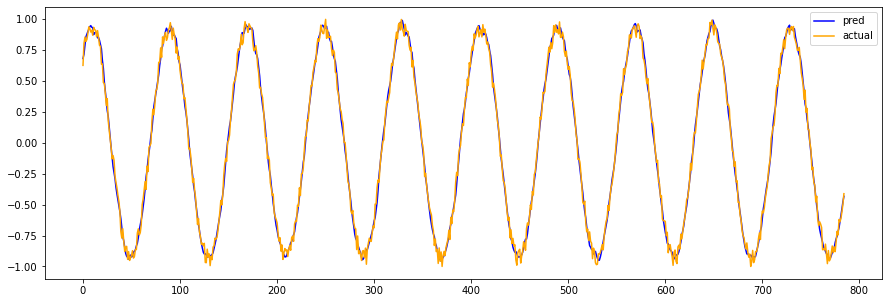

In [5]:
# 9-3 RNNで予測したsin波の評価をしてみよう
#学習したモデルで予測をする
y_pred = model_rnn.predict(x_test)

plt.figure(figsize=(15,5))
#青色で予測値、オレンジ色で実際の値を表示
plt.plot([p[0] for p in y_pred],color="blue",label="pred")
plt.plot([p[0] for p in y_test],color="orange",label="actual")
plt.legend()
plt.show()

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


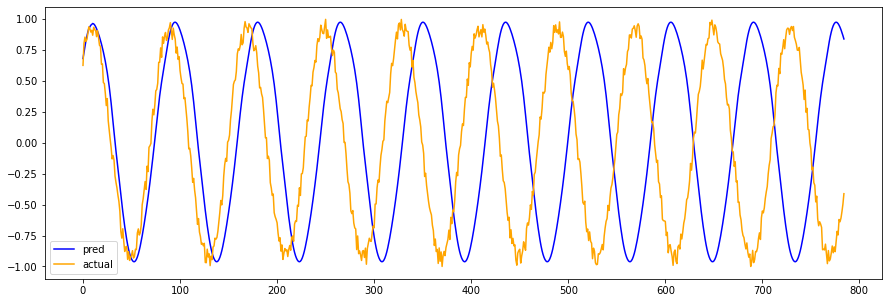

In [6]:
#学習済みモデルと予測に用いる値、実際の値の３つを引数に取る
def predict_all(model, x_test, y_test):

    #最初のhistory_steps分だけ利用する。
    x_tmp = x_test[0]
    pred_result = []
    for index in range(len(y_test)):
        #x_tmpに入っているデータで予測をする
        pred = model.predict(np.array([x_tmp]))

        #x_tmpの最初のデータを削除して、末尾に今回予測したデータの最初の一つを追加する
        x_tmp = np.append(x_tmp[1:,], pred[0][0].reshape(1,1), axis=0)
        pred_result.append(pred[0][0])
        
    plt.figure(figsize=(15,5))
    #予測した値をと実際の値を表示する
    plt.plot(pred_result,color="blue", label="pred")
    plt.plot([p[0] for p in y_test],color="orange", label="actual")
    plt.legend()
    plt.show()

#予測開始
predict_all(model_rnn, x_test, y_test)

In [7]:
# 9-4 CNNでもsin波の予測をしてみよう
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D

#モデルの構築
model_conv = Sequential()
model_conv.add(Conv1D(filters=64, kernel_size=4, strides=1, padding='same', input_shape=x_train.shape[1:], activation='relu'))
model_conv.add(Conv1D(filters=128, kernel_size=4,strides=1, padding='same', activation='relu'))
model_conv.add(GlobalMaxPooling1D())
model_conv.add(Dense(future_steps, activation='tanh'))
model_conv.compile(optimizer = Adam(lr=0.001), loss='mean_squared_error')

#モデルの構造を表示する
print(model_conv.summary())

#予測開始
history = model_conv.fit(x_train, y_train, batch_size=32, epochs=500, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            320       
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           32896     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 33,861
Trainable params: 33,861
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
75/75 [==============================] - 1s 4ms/step - loss: 0.1135
Epoch 2/500
75/75 [============

75/75 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 90/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 91/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 92/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 93/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 94/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 95/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 96/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 97/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 98/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 99/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 100/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 101/500
75/75 [===================

75/75 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 190/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 191/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 192/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 193/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 194/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 195/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 196/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 197/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 198/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 199/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 200/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 201/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 290/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 291/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 292/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 293/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 294/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 295/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 296/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 297/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 298/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 299/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 300/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 301/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 390/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 391/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 392/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 393/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 394/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 395/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 396/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 397/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 398/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 399/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 400/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 401/500
75/75 [=========

75/75 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 490/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 491/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 492/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 493/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 494/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 495/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 496/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 497/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 498/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 499/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 500/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0016


25/25 [==============================] - 0s 2ms/step


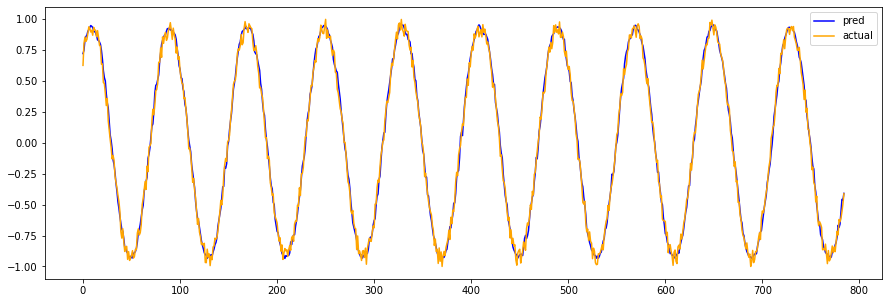

In [8]:
#予測開始
y_pred = model_conv.predict(x_test)

plt.figure(figsize=(15,5))
plt.plot([p[0] for p in y_pred],color="blue",label="pred")
plt.plot([p[0] for p in y_test],color="orange",label="actual")
plt.legend()
plt.show()

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 16ms/step


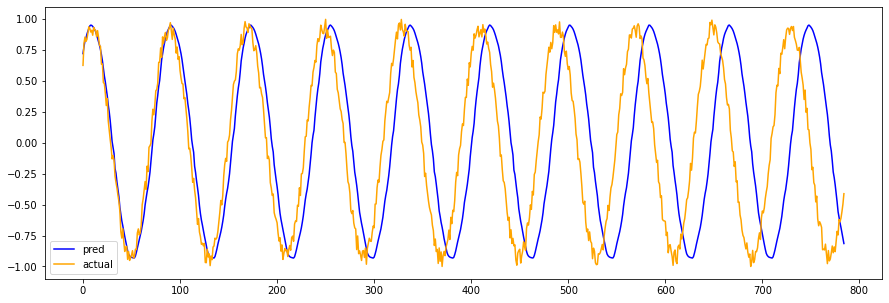

In [9]:
predict_all(model_conv, x_test, y_test)

In [10]:
# 9-5 sin波の予測精度を高めよう
history_steps_v2 = 40
future_steps_v2 = 10

#40ステップ分のデータから10ステップ未来までを予測するようなデータを作成する
x_train_v2, y_train_v2 = create_dataset(train_data, history_steps_v2, future_steps_v2)
x_test_v2, y_test_v2   = create_dataset(test_data, history_steps_v2, future_steps_v2)  


print(x_train_v2.shape)
print(y_train_v2.shape)

(2350, 40, 1)
(2350, 10)


In [11]:
#RNNのモデル構築
model_rnn_v2 = Sequential()  
model_rnn_v2.add(SimpleRNN(units=future_steps_v2, input_shape=(history_steps_v2,1),return_sequences=False))
model_rnn_v2.add(Dense(future_steps_v2,activation="linear"))  
model_rnn_v2.compile(optimizer = Adam(lr=0.001), loss="mean_squared_error",)

#モデルの構造を表示する
print(model_rnn_v2.summary())
        
#学習開始
history = model_rnn_v2.fit(x_train_v2, y_train_v2, batch_size=32, epochs=500, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
74/74 [==============================] - 1s 6ms/step - loss: 0.4029
Epoch 2/500
74/74 [==============================] - 0s 5ms/step - loss: 0.1225
Epoch 3/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0623
Epoch 4/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0393
Epoch 5/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0282
Epoch 6/500
74/74 [============================

74/74 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 94/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 95/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 96/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 97/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 98/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 99/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 100/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 101/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 102/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 103/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 104/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 105/500
74/74 [===============

74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 194/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 195/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 196/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 197/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 198/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 199/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 200/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 201/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 202/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 203/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 204/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 205/500
74/74 [=========

74/74 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 293/500
74/74 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 294/500
74/74 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 295/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 296/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 297/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 298/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 299/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 300/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 301/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 302/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 303/500
74/74 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 304/500
74/74 [=====

Epoch 392/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 393/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 394/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 395/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 396/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 397/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 398/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 399/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 400/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 401/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 402/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 403/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 404/500
74

74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 492/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 493/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 494/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 495/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 496/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 497/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 498/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 499/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 500/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0020


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


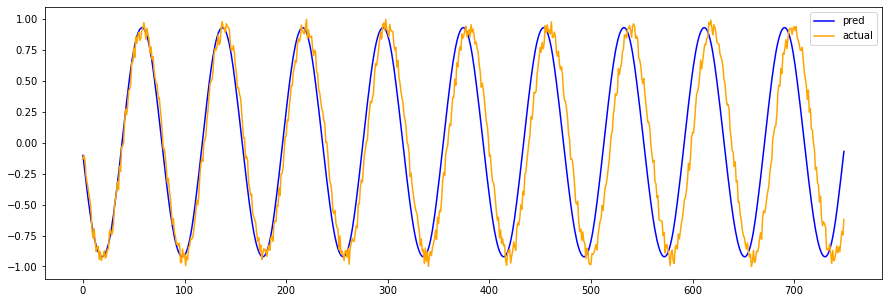

In [12]:
predict_all(model_rnn_v2, x_test_v2, y_test_v2)

In [13]:
#CNNのモデルを構築
model_conv_v2 = Sequential()
model_conv_v2.add(Conv1D(filters=64, kernel_size=4, strides=1, padding='same', input_shape=x_train_v2.shape[1:], activation='relu'))
model_conv_v2.add(Conv1D(filters=128, kernel_size=4,strides=1, padding='same', activation='relu'))
model_conv_v2.add(GlobalMaxPooling1D())
model_conv_v2.add(Dense(future_steps_v2, activation='tanh'))
model_conv_v2.compile(optimizer = Adam(lr=0.001), loss='mean_squared_error')

#モデルの構造を表示
print(model_conv_v2.summary())

#学習開始
history = model_conv_v2.fit(x_train_v2, y_train_v2, batch_size=32, epochs=500, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 40, 64)            320       
                                                                 
 conv1d_3 (Conv1D)           (None, 40, 128)           32896     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 34,506
Trainable params: 34,506
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
74/74 [==============================] - 1s 8ms/step - loss: 0.1552
Epoch 2/500
74/74 [============

74/74 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 90/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 91/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 92/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 93/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 94/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 95/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 96/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 97/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 98/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 99/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 100/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 101/500
74/74 [===================

74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 190/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 191/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 192/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 193/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 194/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 195/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 196/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 197/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 198/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 199/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 200/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 201/500
74/74 [=========

74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 290/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 291/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 292/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 293/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0018
Epoch 294/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 295/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 296/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 297/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 298/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 299/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 300/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 301/500
74/74 [=========

74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 390/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 391/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 392/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 393/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 394/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 395/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 396/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 397/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 398/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 399/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 400/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 401/500
74/74 [=========

74/74 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 490/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 491/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 492/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 493/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 494/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 495/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 496/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 497/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 498/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 499/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 500/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0016


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 22ms/step


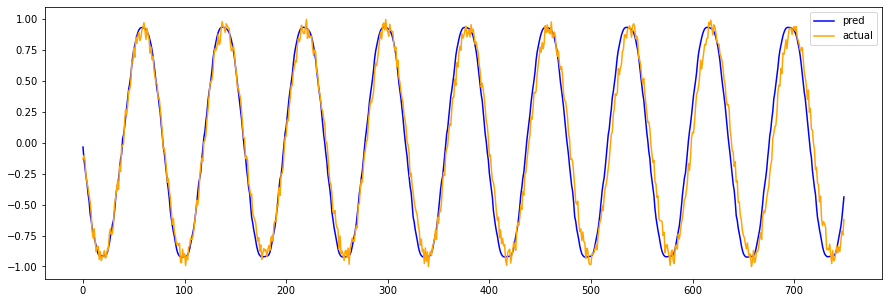

In [14]:
predict_all(model_conv_v2, x_test_v2, y_test_v2)